# Effects of Loan Variables on Loan Amount and Borrower Rate

## by Oreva Egwebe

## Investigation Overview
In this investigation, I wanted to look at the variables that affect loan amount and borrower rate. The main focus was on loan original amount, borrower rate, prosper rating, credit grade, monthly income, employment status and home owners.


## Dataset Overview
This dataset from Prosper loan contains 81 columns and 113,937 observations with variables such as loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others which will be further investigated to find out which factors affect the outcome of a loan and interest rate. I created a smaller dataframe with about 20 columns of interest to help focus my investigation.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('loans.csv')

## Distribution of Loan Amount

Loan amount in the dataset take on a very large range of values, from a minimum of 1000 to a maximum of 35000. The distributon shows a very high frequency for 4000, 10000 and 15000 (in $) loan amounts.

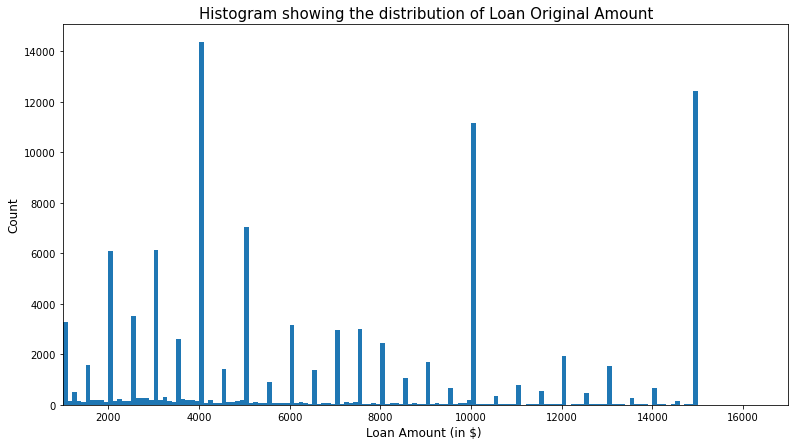

In [5]:
#plot a distribution showing the loan amount and set the bin edges
plt.figure(figsize = [13,7])
base_color=sb.color_palette()[0]
bin_edges= np.arange(0, 15000+100, 100);
plt.hist(data=loans, x='LoanOriginalAmount', bins=bin_edges);
plt.ylabel('Count', fontsize=12)
plt.xlabel('Loan Amount (in $) ', fontsize=12)
plt.xlim(1000, 17000)
plt.title('Histogram showing the distribution of Loan Original Amount', fontsize=15);

## Loan Original Amount vs Employment Status

The chart shows $4000 as a popular loan amount across the different employment categories. This corresponds with the previous histogram of loan original amount plotted.

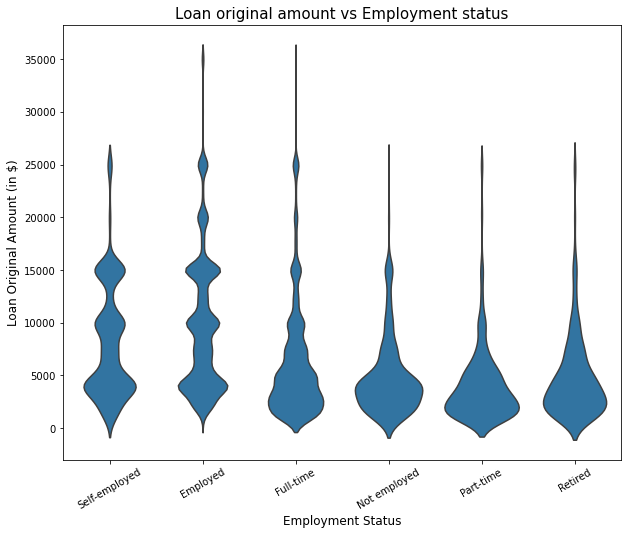

In [7]:
plt.figure(figsize = [10, 8]) 
sb.violinplot(data=loans, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color, inner=None);
plt.title('Loan original amount vs Employment status', fontsize=15)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Loan Original Amount (in $)', fontsize=12)
plt.xticks(rotation=30);

## Credit Grade and Prosper Rating by Borrower Rate

We can see the similarities of how credit grade and prosper rating affect borrower rate despite the fact that credit grade was implemented before 2009 while prosper rating was implemented after 2009. Within each level of rating, we observe an increase in borrower rate based on the ratings (AA is the highest, HR is the Lowest).

In [8]:
#convert CreditGrade and ProsperRating to ordinal categorical variables
order_credit = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=order_credit)
loans['CreditGrade'] = loans['CreditGrade'].astype(ordered_var)

order_prosper = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=order_prosper)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered_var)

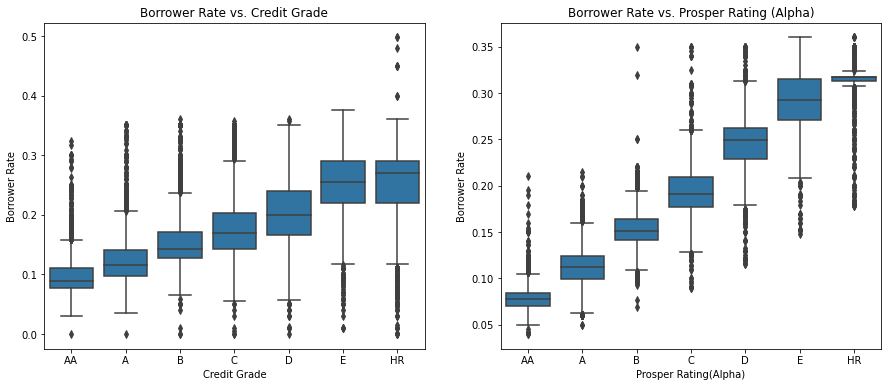

In [10]:
#plot a boxplot of borrowerRate vs CreditGrade
base_color=sb.color_palette()[0]
plt.figure(figsize = [15, 6])
plt.subplot(1,2,1)
sb.boxplot(data = loans, x= 'CreditGrade', y='BorrowerRate', color=base_color);
plt.title('Borrower Rate vs. Credit Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Borrower Rate');


#plot a boxplot to see the relationship between borrowerRate and ProsperRating
plt.subplot(1,2,2)
sb.boxplot(data =loans, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', color=base_color)
plt.title('Borrower Rate vs. Prosper Rating (Alpha)')
plt.xlabel('Prosper Rating(Alpha)')
plt.ylabel('Borrower Rate');

## Correlation of the Numeric Variables

The correlation coefficient of borrower rate and loan original amount is -0.33 and shows a negative moderate correlation between loan original amount and borrower rate which means that borrower rate does not increase as loan original amount increases. There is a weak correlation between stated monthly income and borrower rate, also with loan original amount.

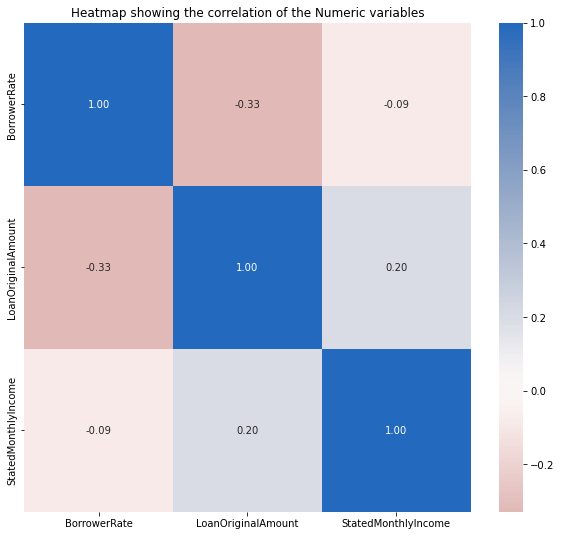

In [11]:
#select the variables to a dataframe
var = loans[['BorrowerRate', 'LoanOriginalAmount', 'StatedMonthlyIncome']]

#plot the heatmap showing the relationship between the numeric variables
plt.figure(figsize= [10, 9])
sb.heatmap(var.corr(), annot=True, fmt='.2f', cmap='vlag_r', center=0);
plt.title('Heatmap showing the correlation of the Numeric variables', fontsize=12);

## Home Owners, Borrower Rate by Year


We can see the trend of home owners and their borrower rates across the years which show borrowers that are not home owners tend to have a higher interest rate compared to home owners.

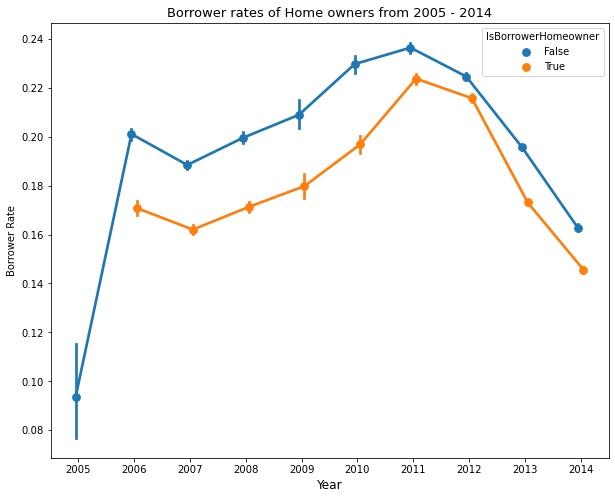

In [12]:
#plot a pointplot to view th borrower rates across the years for home owners
plt.figure(figsize=[10,8])
ax = sb.pointplot(data=loans, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner', dodge=0.1, linestyles="-");
plt.title('Borrower rates of Home owners from 2005 - 2014', fontsize=13);
plt.xlabel('Year', fontsize=12)
plt.ylabel('Borrower Rate');

## Employment Status, Home Owners by Loan Amount and Borrower Rate

We can see clearly from the point plot charts that being a home owner helps you access a higher loan amount for all employment status categories. Borrowers not employed have a higher interest rate despite the fact if they are home owners or not.

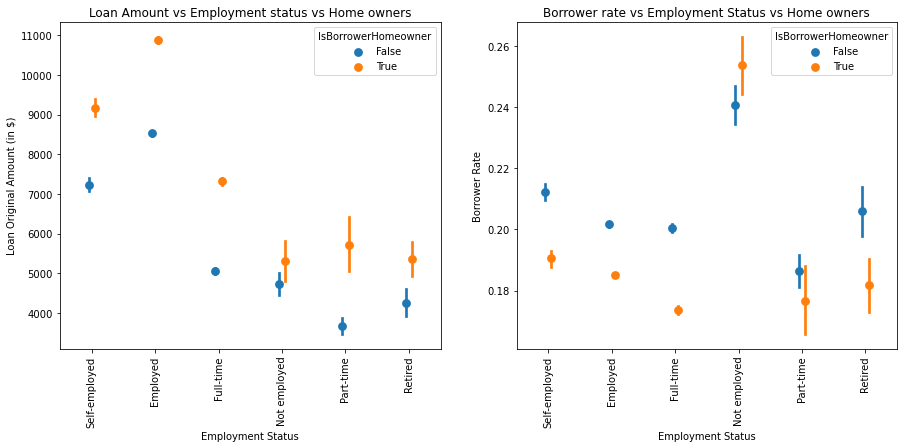

In [13]:
#plot subplots to easily compare the differences
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax = sb.pointplot(data=loans, x='EmploymentStatus', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', dodge=0.1, linestyles="");
plt.title('Loan Amount vs Employment status vs Home owners')
plt.xlabel('Employment Status')
plt.ylabel('Loan Original Amount (in $)');
plt.xticks(rotation=90);

plt.subplot(1,2,2)
ax = sb.pointplot(data=loans, x='EmploymentStatus', y='BorrowerRate', hue='IsBorrowerHomeowner', dodge=0.1, linestyles="");
plt.title('Borrower rate vs Employment Status vs Home owners')
plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate');
plt.xticks(rotation=90);

In [ ]:
# generate HTML slide show
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt